## 1. Reading data

Reading time-series of ERA5 weather reanalysis

In [1]:
import pandas as pd
import xarray as xr
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_ERA5_dataset = '/Users/mikhailgasanov/Yandex.Disk.localized/Code/ERA5.nc'
df_xr = xr.open_dataset(path_ERA5_dataset)

In [3]:
df_xr

<xarray.Dataset>
Dimensions:    (longitude: 101, latitude: 101, time: 8760)
Coordinates:
  * longitude  (longitude) float32 40.0 40.1 40.2 40.3 ... 49.7 49.8 49.9 50.0
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 40.3 40.2 40.1 40.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-19 10:42:04 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [4]:
list(df_xr.keys())

['u10', 't2m', 'sp', 'tp', 'swvl1']

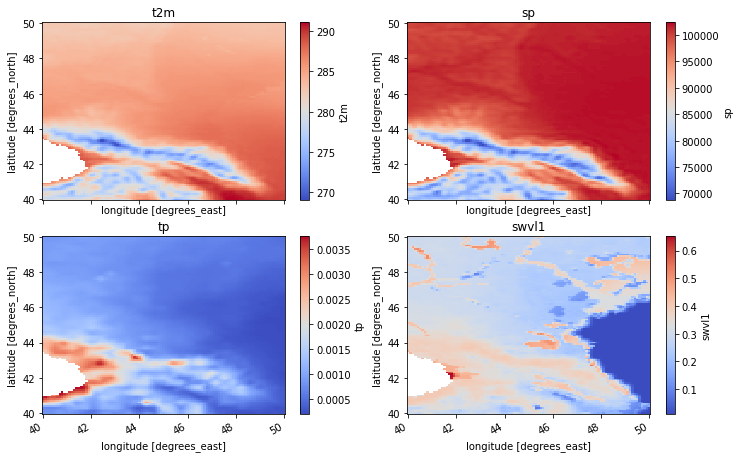

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
fig.autofmt_xdate()

target_plots = ['t2m', 'sp', 'tp', 'swvl1']
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    (df_xr.mean(dim='time')[target_plots[i]]).plot(ax=ax, cmap='coolwarm')
    ax.set_title(target_plots[i])

In [6]:
df_xr

<xarray.Dataset>
Dimensions:    (longitude: 101, latitude: 101, time: 8760)
Coordinates:
  * longitude  (longitude) float32 40.0 40.1 40.2 40.3 ... 49.7 49.8 49.9 50.0
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 40.3 40.2 40.1 40.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 -2.202 -2.218 ... 3.977 3.996
    t2m        (time, latitude, longitude) float32 272.8 272.8 ... 281.7 282.0
    sp         (time, latitude, longitude) float32 1.002e+05 ... 1.021e+05
    tp         (time, latitude, longitude) float32 0.000677 ... 3.021e-05
    swvl1      (time, latitude, longitude) float32 0.3294 0.3281 ... 0.009994
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-19 10:42:04 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

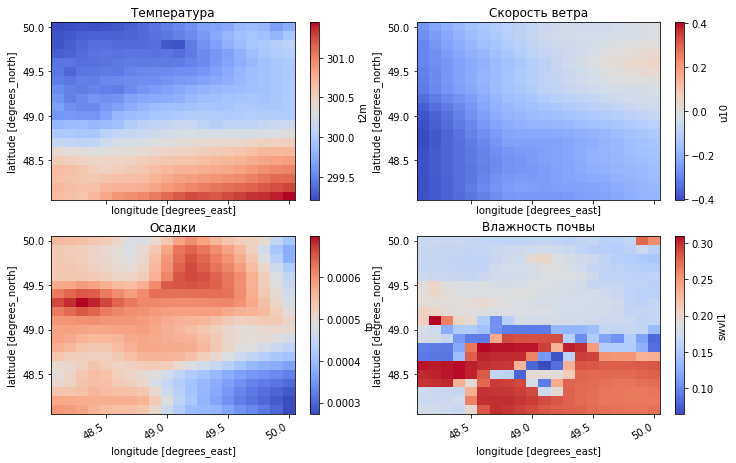

In [7]:
mask_lon = df_xr.longitude > 48
mask_lat = df_xr.latitude > 48
cropped_df = df_xr.where(mask_lon & mask_lat, drop=True)

summer_ds = cropped_df.sel(time=slice("2021-06-01", "2021-08-01"))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
fig.autofmt_xdate()

target_plots = ['t2m', 'u10', 'tp', 'swvl1']
plot_names = ['Температура', 'Скорость ветра', 'Осадки', 'Влажность почвы']
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    (summer_ds.mean(dim='time')[target_plots[i]]).plot(ax=ax, cmap='coolwarm')
    ax.set_title(plot_names[i])
plt.savefig('../plots/input_dataset.png', dpi=300)

In [21]:
cropped_df.to_netcdf('/Users/mikhailgasanov/Documents/ROI')

## Select random point in dataset

In [10]:
lat = 46
lon = 45
df_point = df_xr.sel(latitude=lat,
          longitude=lon, 
          method='nearest')

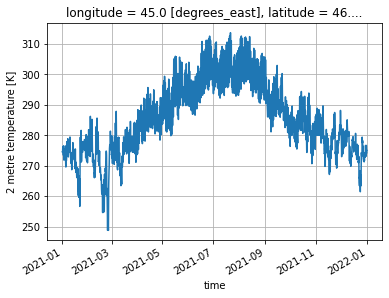

In [11]:
df_point['t2m'].plot()
plt.grid()
# plt.savefig('../plots/temp_point.png', dpi=300)

In [12]:
df_point

<xarray.Dataset>
Dimensions:    (time: 8760)
Coordinates:
    longitude  float32 45.0
    latitude   float32 46.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    u10        (time) float32 -4.066 -3.849 -3.76 ... -0.04815 -0.005462
    t2m        (time) float32 274.5 274.6 274.6 274.5 ... 275.0 274.4 274.2
    sp         (time) float32 1.016e+05 1.016e+05 ... 1.01e+05 1.01e+05
    tp         (time) float32 0.0009933 0.0001031 ... 0.0001226 0.0001244
    swvl1      (time) float32 0.3358 0.3375 0.3396 ... 0.3307 0.3302 0.3298
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-19 10:42:04 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

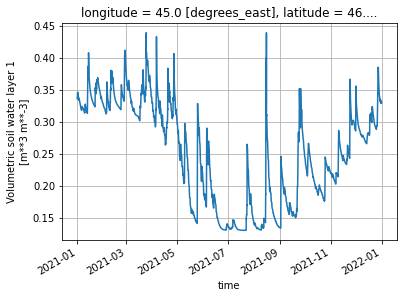

In [13]:
df_point['swvl1'].plot()
plt.grid()
# plt.savefig('../plots/soil_moisture_point.png', dpi=300)

In [14]:
# convert to pandas table format and reset index
df = df_point.to_pandas()
df = df.reset_index()

In [18]:
daily = df.set_index('time').groupby(pd.Grouper(freq='D')).mean()

In [22]:
from sklearn.model_selection import train_test_split

In [32]:
df.to_csv('../data/dataset.csv')

## End